# Understand Data

In [1]:
%cd ..

/Users/udeepa/Documents/UCL/Term 2/COMP0082 Bioinformatics/project


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

### Data Imports

In [3]:
input_path = "input_data/"
classes = ["cytosolic", "secreted", "mitochondrial", "nuclear"]

# Get dictionaries for labels
label2index = {key:i for i, key in enumerate(classes)}
index2label = dict(zip(label2index.values(), label2index.keys())) 

# Get training data
datasets = dict()
for label in classes:
    datasets[label] = list(SeqIO.parse(input_path+label+".fasta", "fasta"))
# Get test data
blind_test_data = list(SeqIO.parse(input_path+"blind_test.fasta", "fasta"))

# Get number of examples in each category
counts = {key:len(val) for i, (key,val) in enumerate(datasets.items())}
counts["total"] = sum([len(sublist) for keys, sublist in datasets.items()])
print(label2index)
print(counts)
print("Number of test data points:  ", len(blind_test_data))

{'cytosolic': 0, 'secreted': 1, 'mitochondrial': 2, 'nuclear': 3}
{'cytosolic': 3004, 'secreted': 1605, 'mitochondrial': 1299, 'nuclear': 3314, 'total': 9222}
Number of test data points:   20


Insights:
1. Need to break up data into 80% train, 10% validation and 10% test. Which take an equal proportion from each class so that proportion of each class same in all data sets. Presents problem of biased towards one class datasets.

### Understand Data

SeqIO: https://biopython.org/wiki/SeqIO <br>
SeqRecord class: https://biopython.org/wiki/SeqRecord

In [4]:
# One entry of train data
print(datasets[label][0])
print()
print("ID:          ", datasets[label][0].id)
print("Sequence:    ", datasets[label][0].seq)
print("Name:        ", datasets[label][0].name)
print("Description: ", datasets[label][0].description)
print("Features:    ", datasets[label][0].features)
print("Annotations: ", datasets[label][0].annotations)

ID: sp|Q9NRG9|AAAS_HUMAN
Name: sp|Q9NRG9|AAAS_HUMAN
Description: sp|Q9NRG9|AAAS_HUMAN Aladin OS=Homo sapiens GN=AAAS PE=1 SV=1
Number of features: 0
Seq('MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLPVLQLTKDP...SHL', SingleLetterAlphabet())

ID:           sp|Q9NRG9|AAAS_HUMAN
Sequence:     MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLPVLQLTKDPLKTPGRLDHGTRTAFIHHREQVWKRCINIWRDVGLFGVLNEIANSEEEVFEWVKTASGWALALCRWASSLHGSLFPHLSLRSEDLIAEFAQVTNWSSCCLRVFAWHPHTNKFAVALLDDSVRVYNASSTIVPSLKHRLQRNVASLAWKPLSASVLAVACQSCILIWTLDPTSLSTRPSSGCAQVLSHPGHTPVTSLAWAPSGGRLLSASPVDAAIRVWDVSTETCVPLPWFRGGGVTNLLWSPDGSKILATTPSAVFRVWEAQMWTCERWPTLSGRCQTGCWSPDGSRLLFTVLGEPLIYSLSFPERCGEGKGCVGGAKSATIVADLSETTIQTPDGEERLGGEAHSMVWDPSGERLAVLMKGKPRVQDGKPVILLFRTRNSPVFELLPCGIIQGEPGAQPQLITFHPSFNKGALLSVGWSTGRIAHIPLYFVNAQFPRFSPVLGRAQEPPAGGGGSIHDLPLFTETSPTSAPWDPLPGPPPVLPHSPHSHL
Name:         sp|Q9NRG9|AAAS_HUMAN
Description:  sp|Q9NRG9|AAAS_HUMAN Aladin OS=Homo sapiens GN=AAAS PE=1 SV=1
Features:     []
Annotations:  {}


In [5]:
# One entry of test data
print(blind_test_data[0])
print()
print("ID:          ", blind_test_data[0].id)
print("Sequence:    ", blind_test_data[0].seq)
print("Name:        ", blind_test_data[0].name)
print("Description: ", blind_test_data[0].description)
print("Features:    ", blind_test_data[0].features)
print("Annotations: ", blind_test_data[0].annotations)

ID: SEQ677
Name: SEQ677
Description: SEQ677
Number of features: 0
Seq('MESKGASSCRLLFCLLISATVFRPGLGWYTVNSAYGDTIIIPCRLDVPQNLMFG...TEA', SingleLetterAlphabet())

ID:           SEQ677
Sequence:     MESKGASSCRLLFCLLISATVFRPGLGWYTVNSAYGDTIIIPCRLDVPQNLMFGKWKYEKPDGSPVFIAFRSSTKKSVQYDDVPEYKDRLNLSENYTLSISNARISDEKRFVCMLVTEDNVFEAPTIVKVFKQPSKPEIVSKALFLETEQLKKLGDCISEDSYPDGNITWYRNGKVLHPLEGAVVIIFKKEMDPVTQLYTMTSTLEYKTTKADIQMPFTCSVTYYGPSGQKTIHSEQAVFDIYYPTEQVTIQVLPPKNAIKEGDNITLKCLGNGNPPPEEFLFYLPGQPEGIRSSNTYTLTDVRRNATGDYKCSLIDKKSMIASTAITVHYLDLSLNPSGEVTRQIGDALPVSCTISASRNATVVWMKDNIRLRSSPSFSSLHYQDAGNYVCETALQEVEGLKKRESLTILVEGKPQIKMTKKTDPSGLSKTIICHVEGFPKPAIQWTITGSGSVINQTEESPYINGRYYSKIIISPEENVTLTCTAENQLERTVNSLNVSAISIPEHDEADEISDENREKVNDQAKLIVGIVVGLLLAALVAGVVYWLYMKKSKTASKHVNKDLGNMEENKKLEENNHKTEA
Name:         SEQ677
Description:  SEQ677
Features:     []
Annotations:  {}


### Understand Features

ProtoParam module: https://biopython.org/wiki/ProtParam <br>
ProteinAnalysis class: https://biopython.org/DIST/docs/api/Bio.SeqUtils.ProtParam.ProteinAnalysis-class.html <br>
ProtoParamData: https://biopython.org/DIST/docs/api/Bio.SeqUtils.ProtParamData-pysrc.html

In [6]:
# Need to convert SeqRecord.seq object to string for ProteinAnalysis
analysed_seq = ProteinAnalysis(str(datasets[label][0].seq))

print("Sequence: ", analysed_seq.sequence)
print()
print("Count amino acids:\n", analysed_seq.count_amino_acids())
print("Percent amino acids:\n", analysed_seq.get_amino_acids_percent())
print()
print("Length:                       ", analysed_seq.length)
print("Molecular weight of protein:  ", analysed_seq.molecular_weight())
print("Aromaticity:                  ", analysed_seq.aromaticity())
print("Instability Index:            ", analysed_seq.instability_index())
print("Isoelecric point:             ", analysed_seq.isoelectric_point())
# [helix, turn, sheet]
print("Secondary structure fraction: ", analysed_seq.secondary_structure_fraction())
print("Charge at pH:                 ", analysed_seq.charge_at_pH(7))
print("Gravy:                        ", analysed_seq.gravy())
# [reduced, oxidized]
print("Molar extinction coefficient: ", analysed_seq.molar_extinction_coefficient())
print("Monoisotopic:                 ", analysed_seq.monoisotopic)
# print("Flexibility: ", analysed_seq.flexibility())
print()
protein_scale = analysed_seq.protein_scale(pickle.load(open("input_data/scales/kd.pickle","rb")), 5)
print("Protein scale:\n", protein_scale)

Sequence:  MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLPVLQLTKDPLKTPGRLDHGTRTAFIHHREQVWKRCINIWRDVGLFGVLNEIANSEEEVFEWVKTASGWALALCRWASSLHGSLFPHLSLRSEDLIAEFAQVTNWSSCCLRVFAWHPHTNKFAVALLDDSVRVYNASSTIVPSLKHRLQRNVASLAWKPLSASVLAVACQSCILIWTLDPTSLSTRPSSGCAQVLSHPGHTPVTSLAWAPSGGRLLSASPVDAAIRVWDVSTETCVPLPWFRGGGVTNLLWSPDGSKILATTPSAVFRVWEAQMWTCERWPTLSGRCQTGCWSPDGSRLLFTVLGEPLIYSLSFPERCGEGKGCVGGAKSATIVADLSETTIQTPDGEERLGGEAHSMVWDPSGERLAVLMKGKPRVQDGKPVILLFRTRNSPVFELLPCGIIQGEPGAQPQLITFHPSFNKGALLSVGWSTGRIAHIPLYFVNAQFPRFSPVLGRAQEPPAGGGGSIHDLPLFTETSPTSAPWDPLPGPPPVLPHSPHSHL

Count amino acids:
 {'A': 38, 'C': 15, 'D': 18, 'E': 26, 'F': 21, 'G': 45, 'H': 18, 'I': 21, 'K': 14, 'L': 61, 'M': 4, 'N': 14, 'P': 53, 'Q': 17, 'R': 30, 'S': 53, 'T': 34, 'V': 38, 'W': 21, 'Y': 5}
Percent amino acids:
 {'A': 0.0695970695970696, 'C': 0.027472527472527472, 'D': 0.03296703296703297, 'E': 0.047619047619047616, 'F': 0.038461538461538464, 'G': 0.08241758241758242, 'H': 0.03296703296703297, 'I': 0.038461538461538464, 'K': 0.0

### Look at feature distribution of data

In [7]:
full_data = list()
for i, (key, val) in enumerate(datasets.items()):
    full_data.extend(val)

In [8]:
# Preprocess the sequence to remove `X` and `B` and `U`
amino_acids = ['A','B','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','U','V','W','Y']
for example in full_data:
    tmp = list(str(example.seq))
    for i, char in enumerate(tmp):
        if char=='X':
            char = np.random.choice(amino_acids)
            tmp[i] = char
        if char=='B':
            if np.random.uniform() > 0.5:
                tmp[i] = 'D'
            else:
                tmp[i] = 'N'
        elif char=='U':
            tmp[i] = 'C'
    tmp = ''.join(tmp)
    example.seq = Seq(tmp) 

In [9]:
analysed_data = [ProteinAnalysis(str(example.seq)) for example in full_data]

In [10]:
print("Before: ", len(analysed_data))
analysed_data = [example for example in analysed_data if example.length < 2000]
print("After:  ", len(analysed_data))

Before:  9222
After:   9055


In [11]:
features = dict()
features["length"] = [example.length for example in analysed_data]
features["molecular_weight"] = [example.molecular_weight() for example in analysed_data]
features["isoelectric_point"] = [example.isoelectric_point() for example in analysed_data]
features["aromaticity"] = [example.aromaticity() for example in analysed_data]
features["instability_index"] = [example.instability_index() for example in analysed_data]
features["charge_at_ph7"] = [example.charge_at_pH(7) for example in analysed_data]
features["gravy"] = [example.gravy() for example in analysed_data]

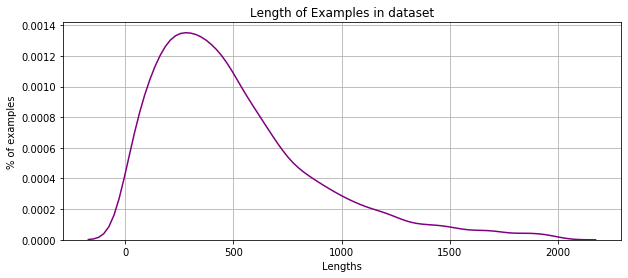

In [12]:
plt.figure(figsize=(10,4))
sns.distplot(features["length"], hist = False, color = 'purple')
plt.title('Length of Examples in dataset')
plt.xlabel('Lengths')
plt.ylabel('% of examples')
plt.grid()
plt.show()

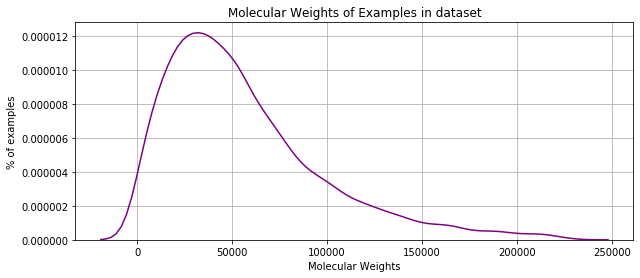

In [13]:
plt.figure(figsize=(10,4))
sns.distplot(features["molecular_weight"], hist = False, color = 'purple')
plt.title('Molecular Weights of Examples in dataset')
plt.xlabel('Molecular Weights')
plt.ylabel('% of examples')
plt.grid()
plt.show()

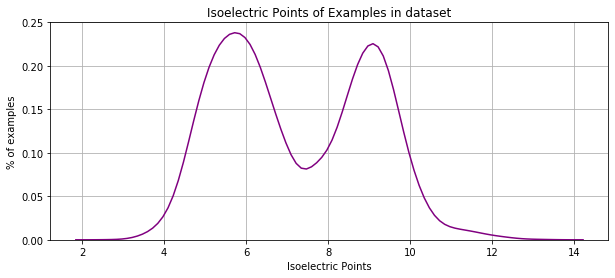

In [14]:
plt.figure(figsize=(10,4))
sns.distplot(features["isoelectric_point"], hist = False, color = 'purple')
plt.title('Isoelectric Points of Examples in dataset')
plt.xlabel('Isoelectric Points')
plt.ylabel('% of examples')
plt.grid()
plt.show()

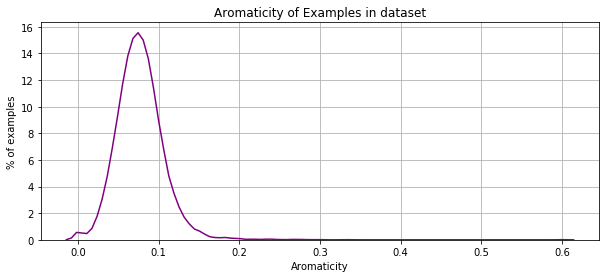

In [15]:
plt.figure(figsize=(10,4))
sns.distplot(features["aromaticity"], hist = False, color = 'purple')
plt.title('Aromaticity of Examples in dataset')
plt.xlabel('Aromaticity')
plt.ylabel('% of examples')
plt.grid()
plt.show()

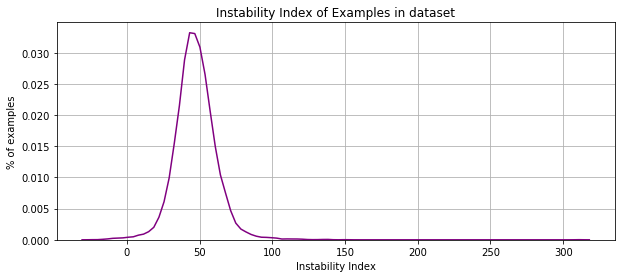

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(features["instability_index"], hist = False, color = 'purple')
plt.title('Instability Index of Examples in dataset')
plt.xlabel('Instability Index')
plt.ylabel('% of examples')
plt.grid()
plt.show()

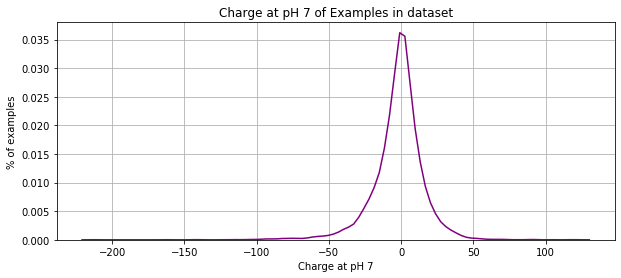

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(features["charge_at_ph7"], hist = False, color = 'purple')
plt.title('Charge at pH 7 of Examples in dataset')
plt.xlabel('Charge at pH 7')
plt.ylabel('% of examples')
plt.grid()
plt.show()

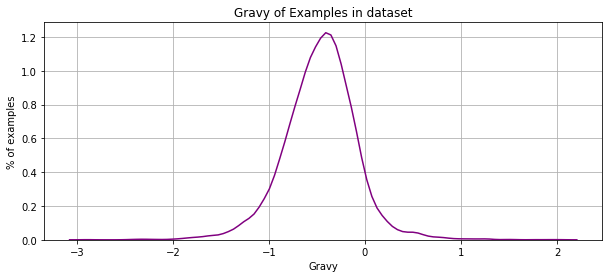

In [18]:
plt.figure(figsize=(10,4))
sns.distplot(features["gravy"], hist = False, color = 'purple')
plt.title('Gravy of Examples in dataset')
plt.xlabel('Gravy')
plt.ylabel('% of examples')
plt.grid()
plt.show()